In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
sns.set_theme(style="darkgrid", palette="rainbow")
%matplotlib inline

In [3]:
dtrain =pd.read_csv("train_data.csv")
dtest =pd.read_csv("test_data.csv")

In [4]:
dtest.shape

(16281, 15)

In [5]:
dtrain.shape

(32561, 15)

In [6]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  Income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [7]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df = pd.concat(
    map(pd.read_csv, ['train_data.csv', 'test_data.csv']), ignore_index=True)
df.shape

(48842, 15)

Let us first understand each method used in the program given above:

pd.concat(): This method stitches the provided datasets either along the row or column axis. It takes the dataframe objects as parameters. Along with that, it can also take other parameters such as axis, ignore_index, etc. map(function, iterable): It executes a specified function for each item in iterables. In the example above, the pd.read_csv() function is applied to all the CSV files in the list given.

In [9]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [11]:
for c in df.columns:
    num_non = df[c].isin([" ?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)

workclass
2799
occupation
2809
native-country
857


In [12]:
for col in df.columns:
    mode = df[col].mode()[0]
    df[col] = df[col].replace(" ?", mode)

In [13]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [14]:
for i in df.columns :
  if df[i].dtypes != "int":
    print (i)
    print (df[i].unique())
    print("\n")

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' '

In [15]:
df["Income "] = df["Income "].replace([" <=50K." ," >50K." ], [" <=50K" , " >50K"])

In [16]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [17]:
df.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income '], dtype=object)

In [18]:
#another way to handel Categorical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.Categorical(df[col]).codes


The choice between these techniques depends on the specific requirements of the problem and the characteristics of the data. In general, one-hot encoding using get_dummies function can be a good choice for small datasets with low cardinality categorical variables, while pandas categorical function can be useful for large datasets with high cardinality categorical variables.

In [19]:
# Feature scaling using normalization
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop('Income ', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['Income '] = df['Income ']
df = df_scaled
print(df.head())

        age  workclass    fnlwgt  education  education-num  marital-status  \
0  0.301370   0.857143  0.044131   0.600000       0.800000        0.666667   
1  0.452055   0.714286  0.048052   0.600000       0.800000        0.333333   
2  0.287671   0.428571  0.137581   0.733333       0.533333        0.000000   
3  0.493151   0.428571  0.150486   0.066667       0.400000        0.333333   
4  0.150685   0.428571  0.220635   0.600000       0.800000        0.333333   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0    0.000000           0.2   1.0  1.0       0.02174           0.0   
1    0.230769           0.0   1.0  1.0       0.00000           0.0   
2    0.384615           0.2   1.0  1.0       0.00000           0.0   
3    0.384615           0.0   0.5  1.0       0.00000           0.0   
4    0.692308           1.0   0.5  0.0       0.00000           0.0   

   hours-per-week  native-country  Income   
0        0.397959            0.95        0  
1        0.122449   

In [20]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0.301370,0.857143,0.044131,0.600000,0.800000,0.666667,0.000000,0.2,1.00,1.0,0.021740,0.0,0.397959,0.95,0
1,0.452055,0.714286,0.048052,0.600000,0.800000,0.333333,0.230769,0.0,1.00,1.0,0.000000,0.0,0.122449,0.95,0
2,0.287671,0.428571,0.137581,0.733333,0.533333,0.000000,0.384615,0.2,1.00,1.0,0.000000,0.0,0.397959,0.95,0
3,0.493151,0.428571,0.150486,0.066667,0.400000,0.333333,0.384615,0.0,0.50,1.0,0.000000,0.0,0.397959,0.95,0
4,0.150685,0.428571,0.220635,0.600000,0.800000,0.333333,0.692308,1.0,0.50,0.0,0.000000,0.0,0.397959,0.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.301370,0.428571,0.137428,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.95,0
48838,0.643836,0.428571,0.209130,0.733333,0.533333,1.000000,0.692308,0.4,0.50,1.0,0.000000,0.0,0.397959,0.95,0
48839,0.287671,0.428571,0.245379,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.95,0
48840,0.369863,0.428571,0.048444,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.95,0


<Axes: >

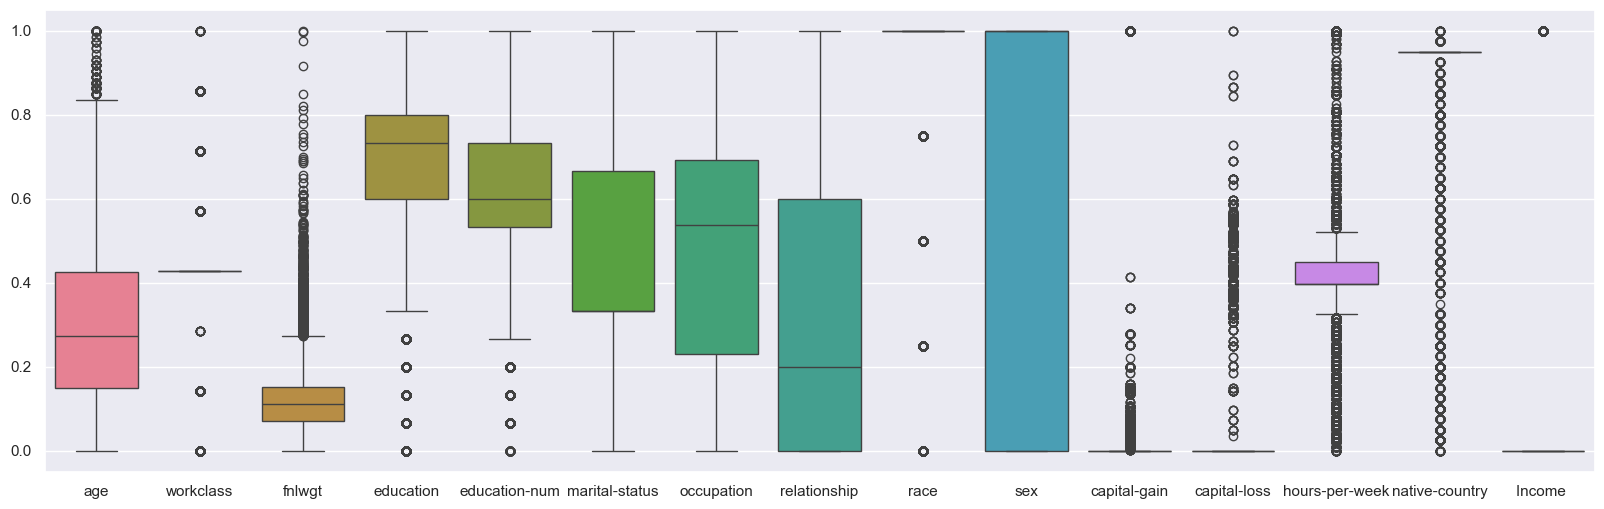

In [21]:
# Check for outliers
fig, ax = plt.subplots(figsize=(20,6))
sns.boxplot(data=df , ax=ax)

In [22]:
# Replace outliers with median
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out = df_out.fillna(df_out.median())

<Axes: >

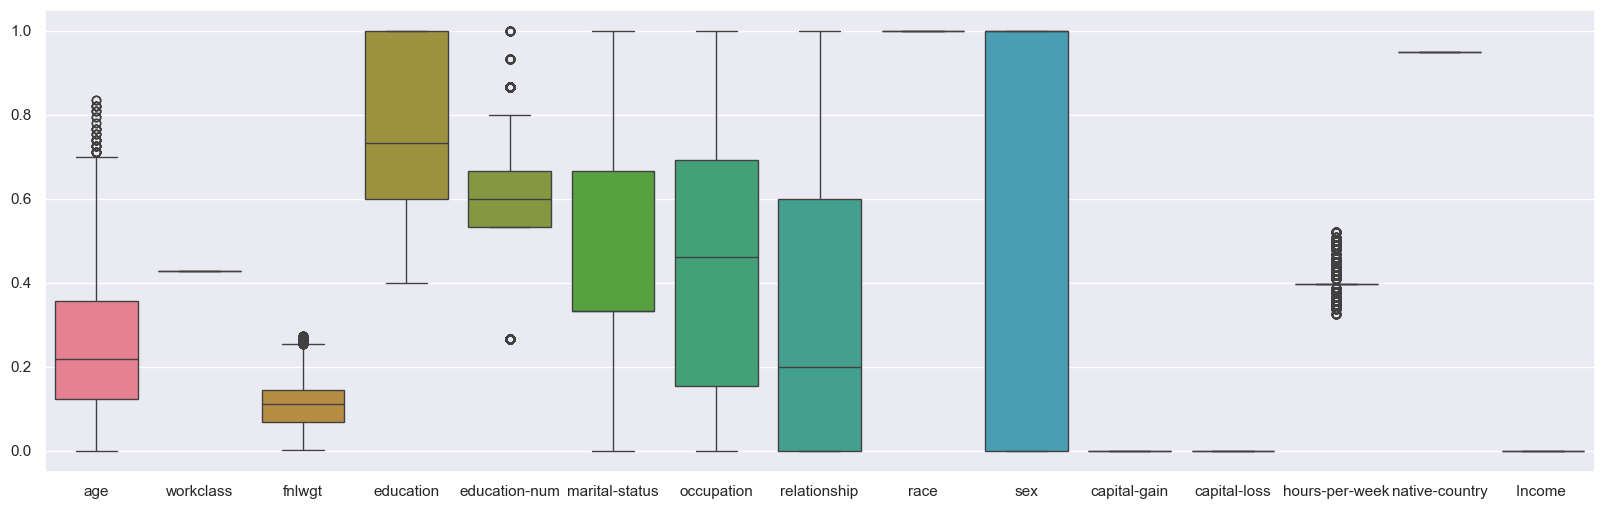

In [23]:
# Check the distribution after removing outliers
fig, ax = plt.subplots(figsize=(20,6))
sns.boxplot(data=df_out, ax=ax)


This code first reads in the train and test data, concatenates them into a single dataframe, and then checks for missing values. It handles categorical data by converting them to numerical codes using the pd.Categorical function. Then, it finds and replaces outliers with the median value and checks the data distribution before and after the replacement. Finally, it handles non-integer columns by replacing missing values with the mode and converts the Income column values to the same format.

In [24]:
df_out.shape

(12693, 15)

In [25]:
X = df.drop(['Income '], axis=1)
y = df['Income ']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test
print(f"No. of xtraining examples: {X_train.shape}")
print(f"No. of ytesting examples: {y_test.shape}")
print(f"No. of ytraning examples: {y_train.shape}")
print(f"No. of xtesting examples: {X_test.shape}")


No. of xtraining examples: (34189, 14)
No. of ytesting examples: (14653,)
No. of ytraning examples: (34189,)
No. of xtesting examples: (14653, 14)



In machine learning, it is generally recommended to split the dataset into training and testing sets before performing feature selection. The reason for this is that the testing data should be used as an independent dataset to evaluate the performance of the model on new, unseen data. If feature selection is performed on the entire dataset before splitting, there is a risk of overfitting, where the model is overly tuned to the specific characteristics of the training data and performs poorly on new data.

By splitting the data first, feature selection is performed only on the training data, which ensures that the selected features are relevant to the problem and not just specific to the training data. Then, the testing data can be used to evaluate the performance of the model with the selected features, providing a more realistic estimate of the model's generalization performance on new data.

In [27]:
# Using SelectKBest for feature selection
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores.nlargest(15, 'Score'))


           Feature       Score
10    capital-gain  880.967441
7     relationship  795.714947
9              sex  530.234737
11    capital-loss  299.162605
0              age  220.162081
5   marital-status  190.767922
4    education-num  178.255040
12  hours-per-week   68.136549
3        education   20.815166
8             race    8.265582
6       occupation    7.251240
13  native-country    0.218664
1        workclass    0.047217
2           fnlwgt    0.014184


In [28]:
# Using mutual information for feature selection
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info_scores = pd.Series(mutual_info, index=X_train.columns)
mutual_info_scores = mutual_info_scores.sort_values(ascending=False)
print(mutual_info_scores.head(15))

relationship      0.116698
marital-status    0.108897
capital-gain      0.082249
age               0.067637
education-num     0.064830
education         0.057976
occupation        0.050535
hours-per-week    0.038020
capital-loss      0.033121
sex               0.031811
fnlwgt            0.031803
workclass         0.015482
native-country    0.007709
race              0.006305
dtype: float64


In [29]:
# Selecting top features from both methods
best_features = feature_scores.nlargest(16, 'Score')['Feature']
print (best_features)

10      capital-gain
7       relationship
9                sex
11      capital-loss
0                age
5     marital-status
4      education-num
12    hours-per-week
3          education
8               race
6         occupation
13    native-country
1          workclass
2             fnlwgt
Name: Feature, dtype: object


In [30]:
# Using Chi-Square for feature selection
chi_scores = chi2(X_train,y_train)

In [31]:
chi_scores

(array([2.20162081e+02, 4.72168194e-02, 1.41843782e-02, 2.08151661e+01,
        1.78255040e+02, 1.90767922e+02, 7.25124016e+00, 7.95714947e+02,
        8.26558219e+00, 5.30234737e+02, 8.80967441e+02, 2.99162605e+02,
        6.81365487e+01, 2.18664408e-01]),
 array([8.33738132e-050, 8.27978987e-001, 9.05197567e-001, 5.05808350e-006,
        1.16526854e-040, 2.16128449e-043, 7.08520628e-003, 4.61011580e-175,
        4.04037026e-003, 2.51119513e-117, 1.34685063e-193, 5.01432463e-067,
        1.52556619e-016, 6.40059463e-001]))

here first array represents chi square values and second array represnts p-values

In [32]:
p_values = pd.Series(chi_scores[1],index = X_train.columns)
p_values.sort_values(ascending = False , inplace = True)

<Axes: >

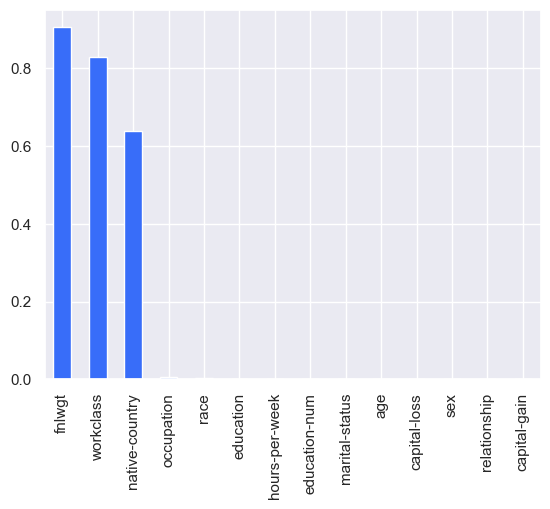

In [33]:
p_values.plot.bar()

In [34]:
# Using ANOVA correlation coefficient for feature selection
f_scores, p_values = f_classif(X_train, y_train)
feature_scores_f = pd.DataFrame({'Feature': X_train.columns, 'Score (f_classif)': f_scores})
feature_scores_f = feature_scores_f.sort_values('Score (f_classif)', ascending=False)
feature_scores_f

,Feature,Score (f_classif)
4,education-num,4120.323523
7,relationship,2398.932967
0,age,1954.932883
12,hours-per-week,1802.410196
10,capital-gain,1774.188839
9,sex,1675.991899
5,marital-status,1377.340948
11,capital-loss,720.724955
3,education,214.136646
8,race,170.846434


In [35]:
X_train.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype=object)

In [36]:
X_train = X_train.drop([ 'workclass', 'fnlwgt','native-country','occupation'], axis=1)
X_test = X_test.drop([ 'workclass', 'fnlwgt','native-country','occupation'], axis=1 )

In [37]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
decisionTree1 = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [38]:
decisionTree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

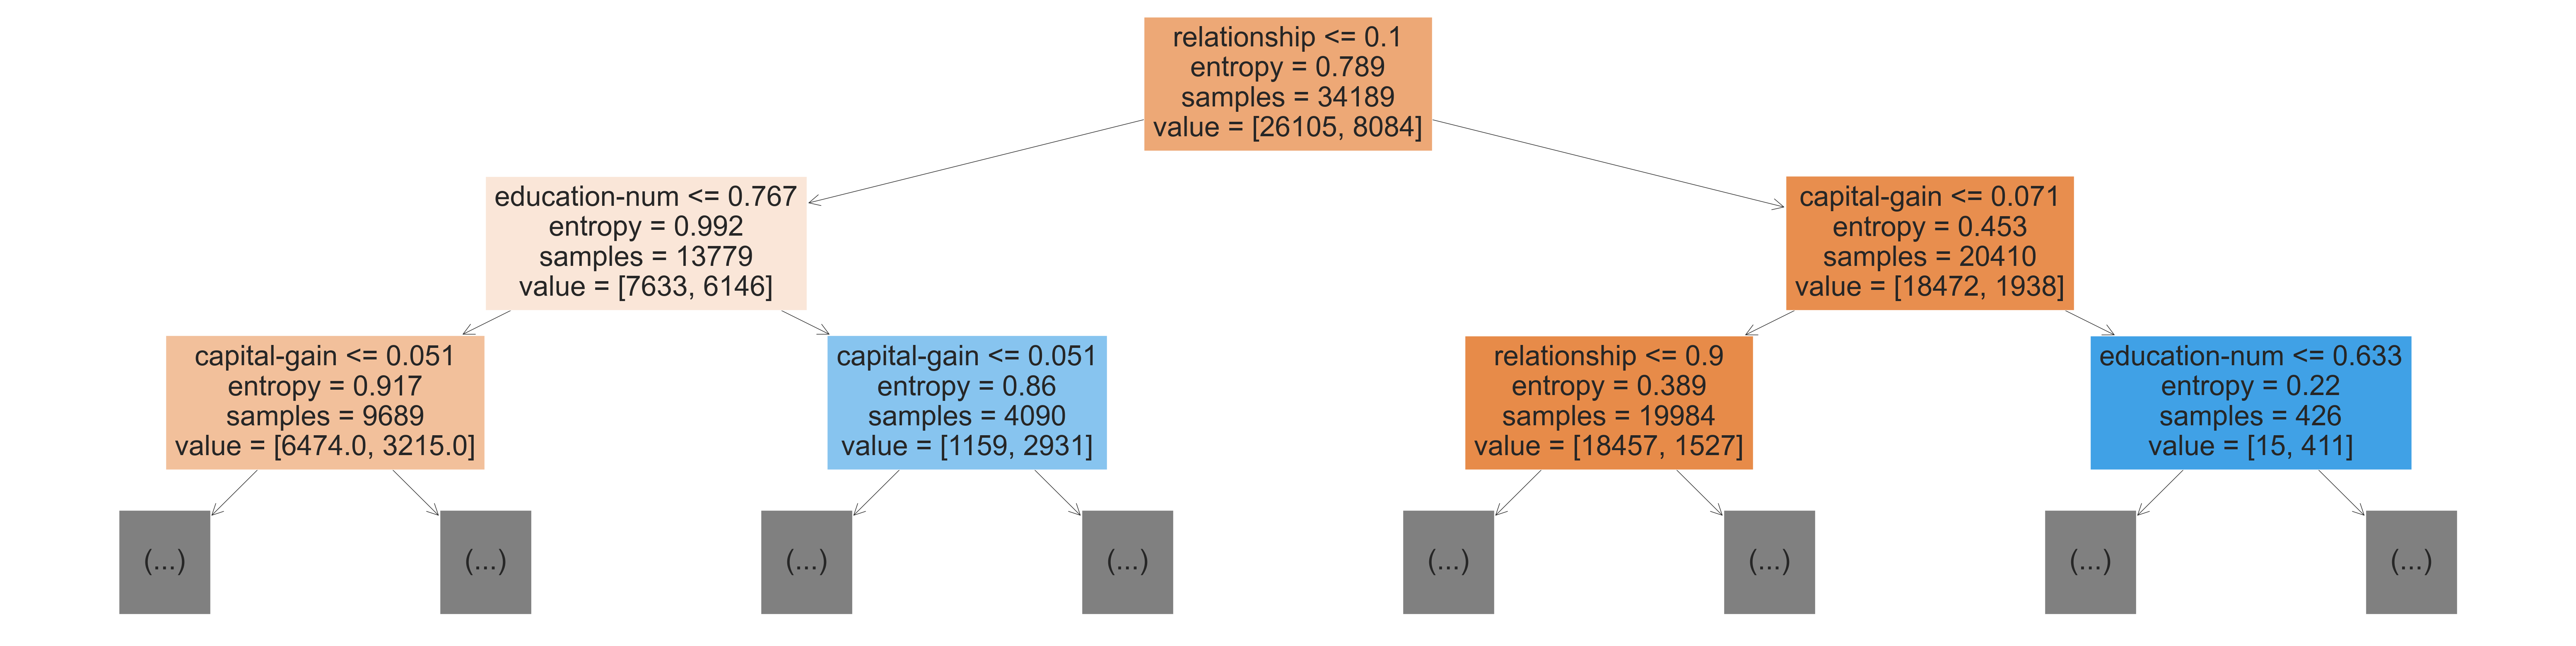

In [39]:
#Visualizing a Decision Tree
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(decisionTree1 , feature_names=X_train.columns, max_depth=2, filled=True);

In [40]:

# print prediction results
pred1 = decisionTree1.predict(X_test)
print(classification_report(y_test, pred1))
confusion_matrix (y_test, pred1)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     11050
           1       0.78      0.48      0.60      3603

    accuracy                           0.84     14653
   macro avg       0.81      0.72      0.75     14653
weighted avg       0.83      0.84      0.82     14653



array([[10549,   501],
       [ 1865,  1738]], dtype=int64)

In [41]:
decisionTree2 = tree.DecisionTreeClassifier(criterion='gini',max_depth=2)
decisionTree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [42]:
# print prediction results
pred2 = decisionTree2.predict(X_test)
print(classification_report(y_test, pred2))
confusion_matrix (y_test, pred2)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89     11050
           1       0.76      0.43      0.55      3603

    accuracy                           0.83     14653
   macro avg       0.80      0.69      0.72     14653
weighted avg       0.82      0.83      0.81     14653



array([[10553,   497],
       [ 2065,  1538]], dtype=int64)

In [43]:
from sklearn.svm import SVC

In [44]:
#train the model on train set
model = SVC(C=1)
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix (y_test, predictions)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11050
           1       0.76      0.56      0.64      3603

    accuracy                           0.85     14653
   macro avg       0.81      0.75      0.77     14653
weighted avg       0.84      0.85      0.84     14653



array([[10411,   639],
       [ 1595,  2008]], dtype=int64)

In [45]:
# train the model on train set
model2 = SVC(C=33)
model2.fit(X_train, y_train)

# print prediction results
predictions2 = model2.predict(X_test)
print(classification_report(y_test, predictions2))
confusion_matrix (y_test, predictions2)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11050
           1       0.75      0.58      0.65      3603

    accuracy                           0.85     14653
   macro avg       0.81      0.76      0.78     14653
weighted avg       0.84      0.85      0.84     14653



array([[10372,   678],
       [ 1522,  2081]], dtype=int64)

In [46]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(tol=0.0001, C=100)
LR.fit(X_train, y_train)
predi = LR.predict(X_test)

print(classification_report(y_test, predi))
confusion_matrix (y_test, predi)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     11050
           1       0.72      0.45      0.56      3603

    accuracy                           0.82     14653
   macro avg       0.78      0.70      0.72     14653
weighted avg       0.81      0.82      0.81     14653



array([[10413,   637],
       [ 1973,  1630]], dtype=int64)

In [47]:

LR2 = LogisticRegression(tol=0.0005, C=10)
LR2.fit(X_train, y_train)
predi2 = LR2.predict(X_test)

print(classification_report(y_test, predi2))

confusion_matrix (y_test, predi2)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     11050
           1       0.72      0.45      0.55      3603

    accuracy                           0.82     14653
   macro avg       0.78      0.70      0.72     14653
weighted avg       0.81      0.82      0.81     14653



array([[10421,   629],
       [ 1981,  1622]], dtype=int64)